In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import sys
sys.path.append('../../')

from fedlab.contrib.dataset.fairscore import FairscoreSynthetic

from fedlab.utils.dataset import FairScorePartitioner
from fedlab.utils.dataset.functional import partition_report

import torch
from torch.utils.data import DataLoader

# Fairscore Synthetic Dataset

In [3]:

trainset = FairscoreSynthetic(train=True, download=False)
train_loader = DataLoader(trainset, batch_size=20, shuffle=True)
print(f"Train data size: {len(trainset)}")
print(f"Train feature number: {trainset.data.shape[1]}")
print(f"Train class distribution: class0:class1:class2 = "
      f"{len(trainset.targets[trainset.targets==0])}:{len(trainset.targets[trainset.targets==1])}:{len(trainset.targets[trainset.targets==2])}")

current directory /Users/aravila/Documents/INRS-UQO/Research/federated_learning/code/FedLab/tutorials/Datasets-DataPartitioner-tutorials
Local file ../../datasets/fairscore/synthetic.csv loaded.
Train data size: 560
Train feature number: 6
Train class distribution: class0:class1:class2 = 167:219:174


In [4]:
testset = FairscoreSynthetic(train=False, download=False)
test_loader = DataLoader(testset, batch_size=20, shuffle=True)
print(f"Train data size: {len(testset)}")
print(f"Train feature number: {testset.data.shape[1]}")
print(f"Train class distribution: class0:class1:class2 = "
      f"{len(testset.targets[testset.targets==0])}:{len(testset.targets[testset.targets==1])}:{len(testset.targets[testset.targets==2])}")

current directory /Users/aravila/Documents/INRS-UQO/Research/federated_learning/code/FedLab/tutorials/Datasets-DataPartitioner-tutorials
Local file ../../datasets/fairscore/synthetic.csv loaded.
Train data size: 240
Train feature number: 6
Train class distribution: class0:class1:class2 = 78:75:87


# Fairscore Synthetic Data Partition

In [5]:
num_clients = 10
num_classes = 3
seed = 2021

col_names = [f"class-{i}" for i in range(num_classes)]

hist_color = '#4169E1'
plt.rcParams['figure.facecolor'] = 'white'

## Label distribution skew
### Quantity-based

In [6]:
# perform partition
noniid_major_label_part = FairScorePartitioner(trainset.targets, 
                                           num_clients=num_clients,
                                           partition="noniid-#label", 
                                           major_classes_num=1,
                                           seed=seed)

In [7]:
# generate partition report
csv_file = "./partition-reports/fairscore_synthe_noniid-label1_10clients.csv"
partition_report(trainset.targets, noniid_major_label_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_major_label_part_df = pd.read_csv(csv_file)
noniid_major_label_part_df = noniid_major_label_part_df.set_index('cid')
for col in col_names:
    noniid_major_label_part_df[col] = (noniid_major_label_part_df[col] * noniid_major_label_part_df['TotalAmount']).astype(int)

# select first 10 clients for bar plot
noniid_major_label_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/fairscore_synthe_noniid-label1_10clients.png", 
            dpi=400, bbox_inches = 'tight')

In [8]:
noniid_major_label_part_df

class-0  class-1  class-2  TotalAmount
cid                                        
0       1764        0        0           42
1          0     5329        0           73
2          0        0     3364           58
3       1764        0        0           42
4          0     5329        0           73
5          0        0     3364           58
6       1764        0        0           42
7          0     5329        0           73
8          0        0     3364           58
9       1681        0        0           41

In [9]:
noniid_major_label_part.client_dict

{0: array([482,  83,  30, 128, 436, 192, 453, 146,  71,  43, 120, 103, 349,
        221, 244, 287, 457, 337, 442, 417,  49, 527, 320,   0, 228, 118,
        218,   7, 240, 333, 528, 141,  34,  27, 106, 433, 171, 488,  11,
        384, 277,  40]),
 1: array([548, 481, 250,  46, 177, 389,  89,  91, 226, 556, 322, 288, 147,
          3, 312, 290, 471, 539, 116, 401, 407, 258, 137,  35, 352, 446,
        213, 513,  65, 553, 334, 555, 355,  16, 421, 524, 455, 365, 496,
        510, 225,  17, 111, 332, 282, 114, 180, 541, 241,  77, 367, 490,
        396,  73, 497, 191, 540,  78,  90, 348,  41, 248,   4,  44, 432,
        201,  92, 465,  37, 325, 462, 264,  79]),
 2: array([294, 278, 181, 336, 503, 387, 315, 151, 148, 131, 113, 402, 356,
        262, 170, 331, 316, 260,  45, 247, 108, 249, 463, 327,  10, 406,
        523, 410, 520,  80, 494,   5, 498, 121,  20, 377, 514, 254, 281,
        261,   2,  22, 172, 537, 394,  39, 427, 550, 500, 188, 530, 470,
        393, 506, 202, 499,  36,  93]),


### Distributed-based (Dirichlet) 

In [10]:
# perform partition
noniid_labeldir_part = FairScorePartitioner(trainset.targets, 
                                        num_clients=num_clients,
                                        partition="noniid-labeldir", 
                                        dir_alpha=0.5,
                                        seed=seed)

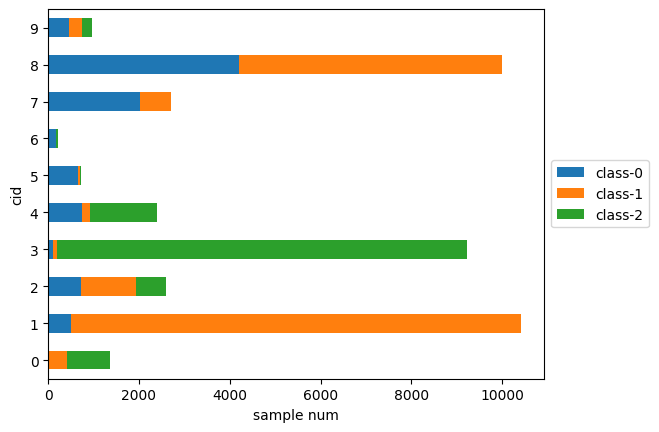

In [11]:
# generate partition report
csv_file = "./partition-reports/fairscore_synthe_noniid_labeldir_10clients.csv"
partition_report(trainset.targets, noniid_labeldir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

noniid_labeldir_part_df = pd.read_csv(csv_file)
noniid_labeldir_part_df = noniid_labeldir_part_df.set_index('cid')
for col in col_names:
    noniid_labeldir_part_df[col] = (noniid_labeldir_part_df[col] * noniid_labeldir_part_df['TotalAmount']).astype(int)

# select first 10 clients for bar plot
noniid_labeldir_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/fairscore_synthe_noniid_labeldir_10clients.png", 
            dpi=400, bbox_inches = 'tight')

## Quantity skew (Dirichlet)

In [12]:
# perform partition
unbalance_part = FairScorePartitioner(trainset.targets, 
                                  num_clients=num_clients,
                                  partition="unbalance", 
                                  dir_alpha=0.5,
                                  seed=seed)

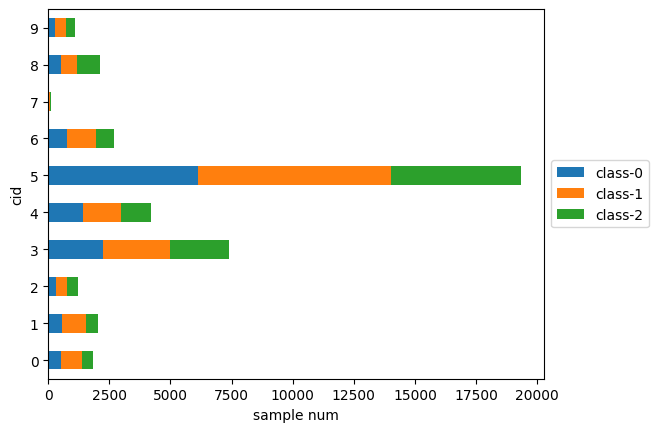

In [13]:
# generate partition report
csv_file = "./partition-reports/fairscore_synthe_unbalance_10clients.csv"
partition_report(trainset.targets, unbalance_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

unbalance_part_df = pd.read_csv(csv_file)
unbalance_part_df = unbalance_part_df.set_index('cid')
for col in col_names:
    unbalance_part_df[col] = (unbalance_part_df[col] * unbalance_part_df['TotalAmount']).astype(int)

# select first 10 clients for bar plot
unbalance_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/fairscore_synthe_unbalance_10clients.png", 
            dpi=400, bbox_inches = 'tight')

## IID

In [14]:
# perform partition
iid_part = FairScorePartitioner(trainset.targets, 
                            num_clients=num_clients,
                            partition="iid",
                            seed=seed)

In [15]:
# generate partition report
csv_file = "./partition-reports/fairscore_synthe_iid_10clients.csv"
partition_report(trainset.targets, iid_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

iid_part_df = pd.read_csv(csv_file)
iid_part_df = iid_part_df.set_index('cid')
for col in col_names:
    iid_part_df[col] = (iid_part_df[col] * iid_part_df['TotalAmount']).astype(int)

# select first 10 clients for bar plot
iid_part_df[col_names].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"./imgs/fairscore_synthe_iid_10clients.png", 
            dpi=400, bbox_inches = 'tight')